# World University Rankings

### About Dataset

###### This dataset is taken from the site https://www.kaggle.com/ for educational purposes.

https://www.kaggle.com/datasets/mylesoneill/world-university-rankings

### Loading data

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import seaborn as sns

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [9]:
! pip install catboost

In [10]:
from catboost import CatBoostRegressor

In [11]:
import seaborn as sns
cm = sns.dark_palette("red", as_cmap=True)

In [12]:
df = pd.read_csv('cwurData.csv')

In [13]:
df.head(5)

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


### Train, test and validation samples

In [15]:
len(df)

2200

In [16]:
train, test = train_test_split(df,train_size=0.6,random_state=42)

In [17]:
val, test = train_test_split(test,train_size=0.5,random_state=42)

In [18]:
len(train)

1320

In [19]:
len(test)

440

In [20]:
len(val)

440

In [21]:
len(train) + len(test) + len(val)

2200

In [22]:
len(test) / len(df)

0.2

In [23]:
len(train) / len(df)

0.6

In [24]:
len(val) / len(df)

0.2

### Define features

In [26]:
train.columns

Index(['world_rank', 'institution', 'country', 'national_rank',
       'quality_of_education', 'alumni_employment', 'quality_of_faculty',
       'publications', 'influence', 'citations', 'broad_impact', 'patents',
       'score', 'year'],
      dtype='object')

In [27]:
train

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
208,9,Princeton University,USA,7,5,16,3,70,25,19,41.0,204,88.56,2014
1641,442,University of Tampere,Finland,5,367,297,218,526,439,511,362.0,679,45.02,2015
881,682,"University François Rabelais, Tours",France,32,188,478,210,684,503,609,663.0,481,44.67,2014
720,521,New York Medical College,USA,165,355,478,210,726,594,493,402.0,481,45.04,2014
1017,818,Zhengzhou University,China,46,355,463,210,725,778,800,783.0,637,44.49,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,439,South China University of Technology,China,23,367,266,218,347,620,511,471.0,196,45.02,2015
1095,896,Nanjing Agricultural University,China,55,355,478,210,674,766,800,849.0,637,44.40,2014
1130,931,Hallym University,South Korea,33,355,478,210,942,950,800,889.0,552,44.36,2014
1294,95,Tufts University,USA,54,60,48,182,166,160,93,85.0,84,51.22,2015


In [28]:
X = ['world_rank', 'institution', 'country', 'national_rank',
       'quality_of_education', 'alumni_employment', 'quality_of_faculty',
       'publications', 'influence', 'citations', 'broad_impact', 'patents', 'year']
cat_features = ['institution', 'country']
y = ['score']

In [29]:
parameters = {'cat_features': cat_features,
              'eval_metric' : 'MAPE',
              'learning_rate' : 0.08,
               'random_seed' : 42,
               'verbose' : 100}

In [30]:
model = CatBoostRegressor(**parameters)

In [31]:
model.fit(train[X],train[y],eval_set=(val[X],val[y]))

0:	learn: 0.0765646	test: 0.0720544	best: 0.0720544 (0)	total: 170ms	remaining: 2m 50s
100:	learn: 0.0048238	test: 0.0056714	best: 0.0056692 (98)	total: 1.9s	remaining: 16.9s
200:	learn: 0.0028532	test: 0.0042970	best: 0.0042970 (200)	total: 3.74s	remaining: 14.9s
300:	learn: 0.0019142	test: 0.0036923	best: 0.0036923 (300)	total: 5.47s	remaining: 12.7s
400:	learn: 0.0013841	test: 0.0034252	best: 0.0034252 (400)	total: 7.2s	remaining: 10.8s
500:	learn: 0.0010463	test: 0.0032718	best: 0.0032717 (498)	total: 9.05s	remaining: 9.02s
600:	learn: 0.0008444	test: 0.0031833	best: 0.0031833 (600)	total: 10.7s	remaining: 7.13s
700:	learn: 0.0007036	test: 0.0031345	best: 0.0031342 (699)	total: 12.5s	remaining: 5.31s
800:	learn: 0.0005976	test: 0.0030972	best: 0.0030969 (798)	total: 14.2s	remaining: 3.53s
900:	learn: 0.0005188	test: 0.0030793	best: 0.0030790 (898)	total: 15.8s	remaining: 1.74s
999:	learn: 0.0004555	test: 0.0030687	best: 0.0030680 (996)	total: 17.5s	remaining: 0us

bestTest = 0.0030

### Testing on a test sample

In [33]:
test['score_pred'] = model.predict(test[X])

In [34]:
test

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year,score_pred
1825,626,University of Texas at Arlington,USA,185,367,567,218,492,532,511,565.0,462,44.47,2015,44.418674
629,430,University of Tampere,Finland,6,355,235,210,554,461,493,370.0,637,45.41,2014,45.417152
2193,994,Ryerson University,Canada,33,367,567,218,811,969,511,975.0,756,44.03,2015,44.005233
636,437,University of Campinas,Brazil,3,355,478,210,297,534,406,386.0,227,45.39,2014,45.423877
56,57,Rice University,USA,41,28,53,94,101,101,53,NaN,101,48.76,2012,48.164276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,37,"University of California, Santa Barbara",USA,25,101,101,28,89,91,38,NaN,101,51.67,2013,52.945744
219,20,"University of California, San Diego",USA,15,32,478,20,16,5,19,16.0,13,68.36,2014,67.680661
44,45,"University of California, Davis",USA,33,79,101,92,23,40,25,NaN,32,51.06,2012,50.405521
1451,252,Florida State University,USA,96,367,334,218,200,184,136,225.0,411,46.53,2015,46.609980


In [35]:
def error(y_true,y_pred):
  print(mean_absolute_error(y_true,y_pred))
  print(mean_absolute_percentage_error(y_true,y_pred))

In [36]:
error(test['score'],test['score_pred'])

0.24252500128746057
0.004171252079877742


### Error analysis

In [38]:
test['error'] = test['score_pred'] - test['score']

In [39]:
test

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year,score_pred,error
1825,626,University of Texas at Arlington,USA,185,367,567,218,492,532,511,565.0,462,44.47,2015,44.418674,-0.051326
629,430,University of Tampere,Finland,6,355,235,210,554,461,493,370.0,637,45.41,2014,45.417152,0.007152
2193,994,Ryerson University,Canada,33,367,567,218,811,969,511,975.0,756,44.03,2015,44.005233,-0.024767
636,437,University of Campinas,Brazil,3,355,478,210,297,534,406,386.0,227,45.39,2014,45.423877,0.033877
56,57,Rice University,USA,41,28,53,94,101,101,53,NaN,101,48.76,2012,48.164276,-0.595724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,37,"University of California, Santa Barbara",USA,25,101,101,28,89,91,38,NaN,101,51.67,2013,52.945744,1.275744
219,20,"University of California, San Diego",USA,15,32,478,20,16,5,19,16.0,13,68.36,2014,67.680661,-0.679339
44,45,"University of California, Davis",USA,33,79,101,92,23,40,25,NaN,32,51.06,2012,50.405521,-0.654479
1451,252,Florida State University,USA,96,367,334,218,200,184,136,225.0,411,46.53,2015,46.609980,0.079980


<Axes: >

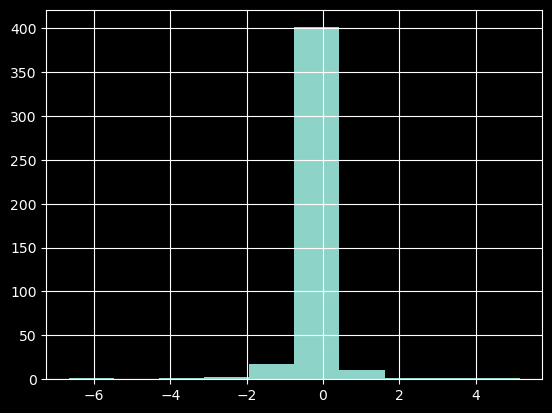

In [40]:
test['error'].hist()

In [41]:
test['error'].mean()

-0.07593784971812031

In [42]:
test['error_abs'] = abs(test['error'])

In [43]:
test

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year,score_pred,error,error_abs
1825,626,University of Texas at Arlington,USA,185,367,567,218,492,532,511,565.0,462,44.47,2015,44.418674,-0.051326,0.051326
629,430,University of Tampere,Finland,6,355,235,210,554,461,493,370.0,637,45.41,2014,45.417152,0.007152,0.007152
2193,994,Ryerson University,Canada,33,367,567,218,811,969,511,975.0,756,44.03,2015,44.005233,-0.024767,0.024767
636,437,University of Campinas,Brazil,3,355,478,210,297,534,406,386.0,227,45.39,2014,45.423877,0.033877,0.033877
56,57,Rice University,USA,41,28,53,94,101,101,53,NaN,101,48.76,2012,48.164276,-0.595724,0.595724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,37,"University of California, Santa Barbara",USA,25,101,101,28,89,91,38,NaN,101,51.67,2013,52.945744,1.275744,1.275744
219,20,"University of California, San Diego",USA,15,32,478,20,16,5,19,16.0,13,68.36,2014,67.680661,-0.679339,0.679339
44,45,"University of California, Davis",USA,33,79,101,92,23,40,25,NaN,32,51.06,2012,50.405521,-0.654479,0.654479
1451,252,Florida State University,USA,96,367,334,218,200,184,136,225.0,411,46.53,2015,46.609980,0.079980,0.079980


<Axes: >

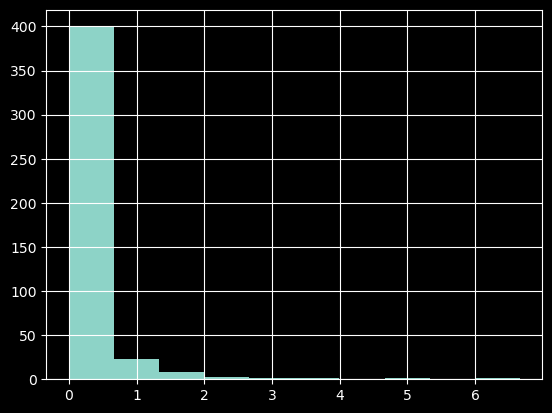

In [44]:
test['error_abs'].hist()

In [45]:
test['error_abs'].describe()

count    440.000000
mean       0.242525
std        0.676369
min        0.000012
25%        0.012616
50%        0.038288
75%        0.136925
max        6.659095
Name: error_abs, dtype: float64

In [46]:
test.sort_values('error_abs',ascending=False).head(10)

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year,score_pred,error,error_abs
211,12,California Institute of Technology,USA,10,6,303,7,48,6,16,24.0,9,85.50,2014,78.840905,-6.659095,6.659095
1211,12,California Institute of Technology,USA,10,6,328,7,53,9,19,25.0,13,84.40,2015,77.879842,-6.520158,6.520158
20,21,Rockefeller University,USA,15,1,101,16,101,28,96,NaN,101,61.74,2012,66.898788,5.158788,5.158788
120,21,Hebrew University of Jerusalem,Israel,1,15,101,15,101,96,101,NaN,24,59.98,2013,63.703944,3.723944,3.723944
1210,11,Yale University,USA,9,10,26,11,18,8,35,20.0,49,86.61,2015,83.241804,-3.368196,3.368196
100,1,Harvard University,USA,1,1,1,1,1,1,1,NaN,7,100.00,2013,96.709271,-3.290729,3.290729
222,23,Northwestern University,USA,17,151,13,105,28,32,25,27.0,61,66.18,2014,63.342448,-2.837552,2.837552
247,48,Lomonosov Moscow State University,Russia,1,14,210,50,264,247,310,361.0,737,56.42,2014,54.022284,-2.397716,2.397716
218,19,Johns Hopkins University,USA,14,24,75,18,4,10,6,3.0,3,71.17,2014,68.960395,-2.209605,2.209605
99,100,Mines ParisTech,France,5,44,4,101,101,101,101,NaN,101,43.36,2012,45.560103,2.200103,2.200103


In [47]:
test['score_group'] = pd.qcut(test['score'],5)

In [48]:
test

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year,score_pred,error,error_abs,score_group
1825,626,University of Texas at Arlington,USA,185,367,567,218,492,532,511,565.0,462,44.47,2015,44.418674,-0.051326,0.051326,"(44.38, 44.71]"
629,430,University of Tampere,Finland,6,355,235,210,554,461,493,370.0,637,45.41,2014,45.417152,0.007152,0.007152,"(44.71, 45.574]"
2193,994,Ryerson University,Canada,33,367,567,218,811,969,511,975.0,756,44.03,2015,44.005233,-0.024767,0.024767,"(43.359, 44.38]"
636,437,University of Campinas,Brazil,3,355,478,210,297,534,406,386.0,227,45.39,2014,45.423877,0.033877,0.033877,"(44.71, 45.574]"
56,57,Rice University,USA,41,28,53,94,101,101,53,NaN,101,48.76,2012,48.164276,-0.595724,0.595724,"(45.574, 48.794]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,37,"University of California, Santa Barbara",USA,25,101,101,28,89,91,38,NaN,101,51.67,2013,52.945744,1.275744,1.275744,"(48.794, 100.0]"
219,20,"University of California, San Diego",USA,15,32,478,20,16,5,19,16.0,13,68.36,2014,67.680661,-0.679339,0.679339,"(48.794, 100.0]"
44,45,"University of California, Davis",USA,33,79,101,92,23,40,25,NaN,32,51.06,2012,50.405521,-0.654479,0.654479,"(48.794, 100.0]"
1451,252,Florida State University,USA,96,367,334,218,200,184,136,225.0,411,46.53,2015,46.609980,0.079980,0.079980,"(45.574, 48.794]"


In [49]:
t = test.groupby('score_group')[['error_abs','error']].agg(['count','mean'])

C:\Users\Светлана\AppData\Local\Temp\ipykernel_9420\2931417175.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  t = test.groupby('score_group')[['error_abs','error']].agg(['count','mean'])


In [50]:
t

error_abs           error          
                     count      mean count      mean
score_group                                         
(43.359, 44.38]         91  0.062181    91  0.048405
(44.38, 44.71]          86  0.032258    86  0.002303
(44.71, 45.574]         87  0.051001    87  0.003251
(45.574, 48.794]        88  0.160695    88  0.028808
(48.794, 100.0]         88  0.905682    88 -0.464018

In [51]:
t.columns = ['_'.join(col).strip() for col in t.columns.values]

In [52]:
t = t.drop('error_count',axis=1)

In [53]:
t['mean_error_diff'] = t['error_abs_mean'] - test['error_abs'].mean()

In [54]:
t['mean_error'] = test['error_abs'].mean()

In [55]:
t.style.background_gradient(cmap=cm,subset=['mean_error_diff'])

,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean_error
score_group,,,,,
"(43.359, 44.38]",91,0.062181,0.048405,-0.180344,0.242525
"(44.38, 44.71]",86,0.032258,0.002303,-0.210267,0.242525
"(44.71, 45.574]",87,0.051001,0.003251,-0.191524,0.242525
"(45.574, 48.794]",88,0.160695,0.028808,-0.081830,0.242525
"(48.794, 100.0]",88,0.905682,-0.464018,0.663157,0.242525


In [56]:
t = test.groupby('score')[['error_abs','error']].agg(['count','mean'])

In [57]:
t.columns = ['_'.join(col).strip() for col in t.columns.values]

In [58]:
t = t.drop('error_count',axis=1)

In [59]:
t

,error_abs_count,error_abs_mean,error_mean
score,,,
43.36,1,2.200103,2.200103
43.79,1,0.052092,-0.052092
44.03,3,0.012346,-0.011763
44.04,1,0.008513,-0.008513
44.05,3,0.007740,0.005625
...,...,...,...
85.50,1,6.659095,-6.659095
86.61,1,3.368196,-3.368196
89.50,1,1.851636,-1.851636


In [60]:
t['mean_error'] = test['error_abs'].mean()

In [61]:
t.style.background_gradient(cmap=cm,subset=['mean_error_diff'])

KeyError: "None of [Index(['mean_error_diff'], dtype='object')] are in the [columns]"

In [115]:
def print_error(col):
  t = test.groupby(col)[['error_abs','error']].agg(['count','mean'])
  t.columns = ['_'.join(col).strip() for col in t.columns.values]
  t = t.drop('error_count',axis=1)
  t['mean_error_diff'] = t['error_abs_mean'] - test['error_abs'].mean()
  t['mean_error'] = test['error_abs'].mean()
  display(t.style.background_gradient(cmap=cm,subset=['mean_error_diff']))

In [117]:
print_error('score')

,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean_error
score,,,,,
43.360000,1,2.200103,2.200103,1.957578,0.242525
43.790000,1,0.052092,-0.052092,-0.190433,0.242525
44.030000,3,0.012346,-0.011763,-0.230179,0.242525
44.040000,1,0.008513,-0.008513,-0.234012,0.242525
44.050000,3,0.007740,0.005625,-0.234785,0.242525
44.060000,2,0.009213,-0.000226,-0.233312,0.242525
44.080000,1,0.003990,0.003990,-0.238535,0.242525
44.100000,2,0.017575,0.007325,-0.224950,0.242525
44.110000,1,0.001226,0.001226,-0.241299,0.242525


In [119]:
print_error('year')

,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean_error
year,,,,,
2012,19,0.914151,0.007505,0.671626,0.242525
2013,20,1.212686,0.400342,0.970161,0.242525
2014,207,0.184873,-0.123149,-0.057652,0.242525
2015,194,0.138246,-0.082837,-0.104279,0.242525


In [121]:
test.columns

Index(['world_rank', 'institution', 'country', 'national_rank',
       'quality_of_education', 'alumni_employment', 'quality_of_faculty',
       'publications', 'influence', 'citations', 'broad_impact', 'patents',
       'score', 'year', 'score_pred', 'error', 'error_abs', 'score_group'],
      dtype='object')

In [123]:
print_error('world_rank')

,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean_error
world_rank,,,,,
1,1,3.290729,-3.290729,3.048204,0.242525
3,1,1.851636,-1.851636,1.609111,0.242525
6,1,1.128944,-1.128944,0.886419,0.242525
8,1,1.304610,1.304610,1.062085,0.242525
11,1,3.368196,-3.368196,3.125671,0.242525
12,3,4.947090,-4.947090,4.704565,0.242525
19,1,2.209605,-2.209605,1.967080,0.242525
20,1,0.679339,-0.679339,0.436814,0.242525
21,2,4.441366,4.441366,4.198841,0.242525


In [127]:
test['world_rank_group'] = pd.qcut(test['world_rank'],10)

In [129]:
print_error('world_rank_group')

C:\Users\Светлана\AppData\Local\Temp\ipykernel_9420\1727604919.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  t = test.groupby(col)[['error_abs','error']].agg(['count','mean'])


,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean_error
world_rank_group,,,,,
"(0.999, 59.9]",44,1.524982,-0.797756,1.282457,0.242525
"(59.9, 121.8]",44,0.471368,0.044413,0.228843,0.242525
"(121.8, 228.7]",44,0.156641,0.009810,-0.085884,0.242525
"(228.7, 341.0]",44,0.093137,-0.023312,-0.149388,0.242525
"(341.0, 443.5]",44,0.060631,0.018165,-0.181894,0.242525
"(443.5, 553.4]",44,0.047458,0.003530,-0.195067,0.242525
"(553.4, 671.2]",44,0.027016,-0.007864,-0.215509,0.242525
"(671.2, 776.2]",44,0.015886,-0.002103,-0.226639,0.242525
"(776.2, 892.1]",44,0.016596,-0.004896,-0.225929,0.242525


<Axes: xlabel='year'>

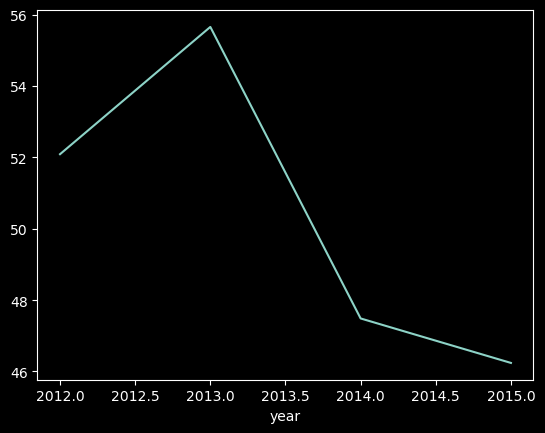

In [131]:
test.groupby('year')['score'].mean().plot()

In [137]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,world_rank,42.042690
1,quality_of_education,12.222495
2,alumni_employment,9.061909
3,quality_of_faculty,7.194468
4,citations,7.143356
5,year,6.208727
6,influence,6.155085
7,broad_impact,3.651391
8,patents,2.453263
9,publications,2.157527
